In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [116]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the ride & filter by city and sume the fare
ride_data=pd.read_csv(ride_data_to_load, encoding="ISO-8859-1")
ride_data=pd.DataFrame(ride_data.loc[:,["city","fare"]])

ride_data_filter=round(ride_data.groupby("city")["fare"].agg(["sum", "count", "mean"]),2)
ride_data_filter=ride_data_filter.rename(columns = {"sum": "Total Fare", "count": "Ride Count", "mean": "Average Fare"})

In [143]:
#Read the city data and combined with the above data
city_data=pd.read_csv(city_data_to_load, encoding="ISO-8859-1")

combined_data = pd.merge(ride_data_filter, city_data, on="city", how="inner")
combined_data=pd.DataFrame(combined_data.rename(columns = {"driver_count": "Driver Count", "type": "Type"}))
combined_data.head()

,city,Total Fare,Ride Count,Average Fare,Driver Count,Type
0,Amandaburgh,443.55,18,24.64,12,Urban
1,Barajasview,557.31,22,25.33,26,Urban
2,Barronchester,582.76,16,36.42,11,Suburban
3,Bethanyland,593.21,18,32.96,22,Suburban
4,Bradshawfurt,400.64,10,40.06,7,Rural


## Bubble Plot of Ride Sharing Data

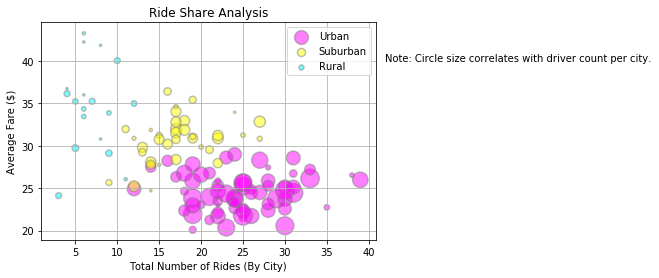

In [203]:
# Obtain the x and y coordinates for each of the three city types

#Urban, suburban, rural
urban = combined_data.loc[combined_data["Type"]== "Urban"]
suburban = combined_data.loc[combined_data["Type"]== "Suburban"]
rural = combined_data.loc[combined_data["Type"]== "Rural"]

# Build the scatter plots for each city types
plt.scatter(urban["Ride Count"], urban["Average Fare"], color = "magenta", edgecolors="grey", 
            s = urban["Driver Count"]*5, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(suburban["Ride Count"], suburban["Average Fare"], color = "yellow", edgecolors="grey", 
            s = suburban["Driver Count"]*5, label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rural["Ride Count"], rural["Average Fare"], color = "cyan", edgecolors="grey", 
            s = rural["Driver Count"]*5, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Create a legend, Incorporate a text label regarding circle size, Save Figure
plt.title("Ride Share Analysis")
plt.xlabel("Total Number of Rides (By City)")
plt.ylabel("Average Fare ($)")
plt.text(42,40,"Note: Circle size correlates with driver count per city.")
plt.legend(loc= "upper right")
plt.grid()
plt.savefig("Ride Share Analysis.png")
plt.show()

## Total Fares by City Type

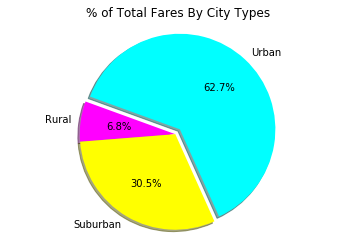

In [204]:
# Calculate by Type and Fares Percents
fare_type_pie = combined_data.groupby("Type")["Total Fare"].sum()

#Set up the settings
labels = ["Rural","Suburban","Urban"]
colors = ["magenta","yellow","cyan"]
explode = (0, 0, 0.07)

plt.pie(fare_type_pie, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.title("% of Total Fares By City Types")
plt.savefig("% of Total Fares By City Types.png")
plt.show()

## Total Rides by City Type

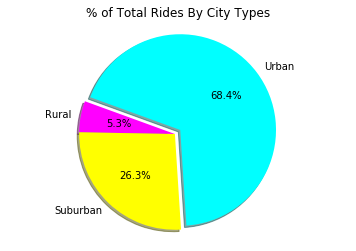

In [206]:
# Calculate Type and Ride Count Percents
rides_type_pie = combined_data.groupby("Type")["Ride Count"].sum()

#Set up the settings
labels = ["Rural","Suburban","Urban"]
colors = ["magenta","yellow","cyan"]
explode = (0, 0, 0.07)

plt.pie(rides_type_pie, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.title("% of Total Rides By City Types")
plt.savefig("% of Total Rides By City Types.png")
plt.show()


## Total Drivers by City Type

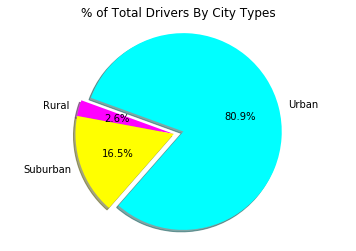

In [209]:
# Calculate Type and Ride Count Percents
drivers_type_pie = combined_data.groupby("Type")["Driver Count"].sum()

#Set up the settings
labels = ["Rural","Suburban","Urban"]
colors = ["magenta","yellow","cyan"]
explode = (0, 0, 0.1)

plt.pie(drivers_type_pie, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.title("% of Total Drivers By City Types")
plt.savefig("% of Total Drivers By City Types.png")
plt.show()

